# Visualising memory access

In [1]:
import numpy as np
def ceil_div(x, y):
    temp = x // y
    if (x%y>0):
        temp=temp+1
    return temp

class struct:
    def __init__(self, inp=None):
        if inp is not None:
            self.absorb(inp)
        else:
            self.x = 0
            self.y = 0
            self.z = 0       

    def absorb(self, inp):
        self.x = inp[0]
        self.y = inp[1]
        self.z = inp[2]

    def emit(self):
        return (self.x, self.y, self.z)

## Traditional method

In [2]:
global_size = np.ones(3, dtype=np.int32)
block_size = np.ones(3, dtype=np.int32)
global_dim = np.ones(3, dtype=np.int32)

N0 = 16
N1 = 16

global_size[0:2] = [16,16]
block_size[0:2] = [8,8] 

for n, x in enumerate(global_size):
    global_dim[n]=ceil_div(x, block_size[n]) 

gridDim = struct(global_dim)
blockDim = struct(block_size)
threadIdx = struct()
blockIdx = struct()

fill=np.zeros(global_size[0:2])

for i2 in range(0, gridDim.z):
    for i1 in range(0, gridDim.y):
        for i0 in range(0, gridDim.x):
            #print(f"Block [{i0}, {i1}, {i2}]")
            blockIdx.absorb((i0,i1,i2))
            for s2 in range(0, blockDim.z):
                for s1 in range(0, blockDim.y):
                    #print(f"[y={s1},z={s2}] ", end='')
                    for s0 in range(0, blockDim.x):
                        threadIdx.absorb((s0,s1,s2))
                        x0 = blockIdx.x * blockDim.x + threadIdx.x
                        x1 = blockIdx.y * blockDim.y + threadIdx.y

                        if ((x0<N0) and (x1<N1)):
                            fill[x0,x1]=1.0
                    
                        #print(f"[{s0}]({x0},{x1}) ", end='')
                    #print()
                #print()

## Blocksize method

In [3]:
global_size = np.ones(3, dtype=np.int32)
block_size = np.ones(3, dtype=np.int32)
global_dim = np.ones(3, dtype=np.int32)

N0 = 126
N1 = 126

global_size[0:2] = [N0,N1]
block_size[0:2] = [8,8] 

for n, x in enumerate(global_size):
    global_dim[n]=ceil_div(x, block_size[n]) 

fill=np.zeros(global_size[0:2])

# Independent block size?
BLOCKSIZE=np.cumsum(block_size)[-1]

gridDim = struct(global_dim)
blockDim = struct((block_size[0]*block_size[1],1,1))
threadIdx = struct()
blockIdx = struct()

for i2 in range(0, gridDim.z):
    for i1 in range(0, gridDim.y):
        for i0 in range(0, gridDim.x):
            #print(f"Block [{i0}, {i1}, {i2}]")
            blockIdx.absorb((i0,i1,i2))
            for s2 in range(0, blockDim.z):
                for s1 in range(0, blockDim.y):
                    #print(f"[y={s1},z={s2}] ", end='')
                    for s0 in range(0, blockDim.x):
                        #print(s0,s1,s2)
                        threadIdx.absorb((s0,s1,s2))
                        x0 = blockIdx.x * BLOCKSIZE + (threadIdx.x // BLOCKSIZE)
                        x1 = blockIdx.y * BLOCKSIZE + (threadIdx.x % BLOCKSIZE)
                        if ((x0<N0) and (x1<N1)):
                            fill[x0,x1]=1.0
                        #print(f"[{s0}]({x0},{x1}) ", end='')
                    #print()
                #print()

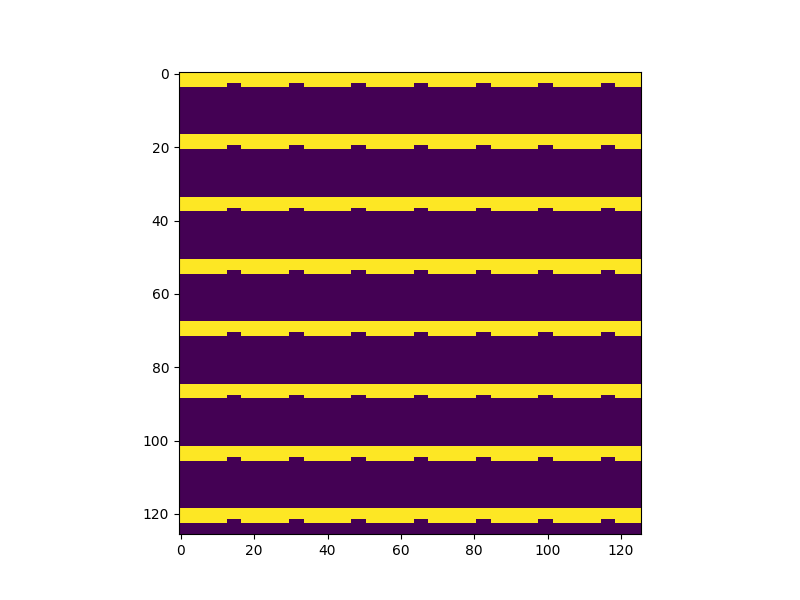

Min grid is 0.0


In [4]:
from matplotlib import pyplot as plt

%matplotlib widget

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.imshow(fill)
plt.show()

print(f"Min grid is {np.min(fill)}")